In [1]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time
from scipy import stats

from api_keys import weather_api_key
from citipy import citipy

In [2]:
# Longitude and Latitude
long = (-180,180)
lat = (-90,90)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat[0], lat[1], size=1500)
lngs = np.random.uniform(long[0], long[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'imperial'

weather_df = pd.DataFrame(cities)
weather_df = weather_df.rename(columns = {0: 'City'})

weather_df['Longitude'] = ''
weather_df['Latitude'] = ''
weather_df['Temperature'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''

weather_df

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,sibu,,,,,,,,
1,snezhnogorsk,,,,,,,,
2,hermanus,,,,,,,,
3,tosagua,,,,,,,,
4,lagos,,,,,,,,
...,...,...,...,...,...,...,...,...,...
602,gornopravdinsk,,,,,,,,
603,lorengau,,,,,,,,
604,coquimbo,,,,,,,,
605,svetlyy,,,,,,,,


In [4]:
for i, rows in weather_df.iterrows():
    query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + rows['City']
    response = requests.get(query_url)
    weather_data = response.json()
    if i % 50 == 0:
        time.sleep(30)
    try:
        weather_df.loc[i,'Longitude'] = weather_data['coord']['lon']
        weather_df.loc[i,'Latitude'] = weather_data['coord']['lat']
        weather_df.loc[i,'Temperature'] = weather_data['main']['temp_max']
        weather_df.loc[i,'Humidity'] = weather_data['main']['humidity']
        weather_df.loc[i,'Cloudiness'] = weather_data['clouds']['all']
        weather_df.loc[i,'Wind Speed'] = weather_data['wind']['speed']
        weather_df.loc[i,'Country'] = weather_data['sys']['country']
        weather_df.loc[i,'Date'] = weather_data['dt']
        print(f'Download {i+1} of {len(weather_df)} complete: {rows["City"]}')
    
    except (KeyError , IndexError):
        print(f'Download {i+1} of {len(weather_df)}, city not found: {rows["City"]}')

Download 1 of 607 complete: sibu
Download 2 of 607 complete: snezhnogorsk
Download 3 of 607 complete: hermanus
Download 4 of 607 complete: tosagua
Download 5 of 607 complete: lagos
Download 6 of 607 complete: bethel
Download 7 of 607 complete: jamestown
Download 8 of 607 complete: hobart
Download 9 of 607 complete: przasnysz
Download 10 of 607 complete: vaini
Download 11 of 607 complete: narsaq
Download 12 of 607 complete: dingle
Download 13 of 607 complete: torbay
Download 14 of 607 complete: barcelos
Download 15 of 607 complete: comodoro rivadavia
Download 16 of 607 complete: ushuaia
Download 17 of 607 complete: tiksi
Download 18 of 607 complete: tezu
Download 19 of 607 complete: thompson
Download 20 of 607 complete: ribeira grande
Download 21 of 607 complete: abay
Download 22 of 607 complete: sungaipenuh
Download 23 of 607, city not found: doctor pedro p. pena
Download 24 of 607 complete: santa maria
Download 25 of 607 complete: busselton
Download 26 of 607 complete: chokurdakh
Down

Download 209 of 607 complete: berlevag
Download 210 of 607 complete: banepa
Download 211 of 607, city not found: zlatoustovsk
Download 212 of 607 complete: basco
Download 213 of 607 complete: newport
Download 214 of 607 complete: iquique
Download 215 of 607 complete: talnakh
Download 216 of 607 complete: north myrtle beach
Download 217 of 607 complete: hendek
Download 218 of 607 complete: adilabad
Download 219 of 607 complete: marrakesh
Download 220 of 607 complete: najran
Download 221 of 607 complete: lebu
Download 222 of 607 complete: faya
Download 223 of 607 complete: vitim
Download 224 of 607 complete: tabuk
Download 225 of 607 complete: buala
Download 226 of 607 complete: katherine
Download 227 of 607 complete: kapchorwa
Download 228 of 607 complete: san quintin
Download 229 of 607 complete: morinville
Download 230 of 607 complete: bawku
Download 231 of 607 complete: boguchany
Download 232 of 607 complete: itamaraca
Download 233 of 607 complete: iqaluit
Download 234 of 607 complet

Download 417 of 607 complete: karratha
Download 418 of 607 complete: kargopol
Download 419 of 607 complete: beian
Download 420 of 607 complete: nioro
Download 421 of 607 complete: kirkenaer
Download 422 of 607 complete: umm kaddadah
Download 423 of 607 complete: mitsamiouli
Download 424 of 607 complete: turan
Download 425 of 607 complete: la troncal
Download 426 of 607 complete: chuy
Download 427 of 607 complete: manicore
Download 428 of 607, city not found: zachagansk
Download 429 of 607 complete: killybegs
Download 430 of 607 complete: porto novo
Download 431 of 607 complete: waipawa
Download 432 of 607 complete: srivardhan
Download 433 of 607 complete: bogo
Download 434 of 607 complete: la rioja
Download 435 of 607 complete: yuci
Download 436 of 607, city not found: barbar
Download 437 of 607 complete: zhigalovo
Download 438 of 607 complete: oranjemund
Download 439 of 607 complete: solnechnyy
Download 440 of 607 complete: mankachar
Download 441 of 607 complete: villingen-schwenninge

In [5]:
# Converts blank spaces to NAN
weather_df = weather_df.replace(r'^\s*$', np.NaN, regex=True)
weather_df = weather_df.dropna(how = 'any')

weather_df.to_csv("output/weatherpy.csv", index=False, header=True)
print(f'After removing NaN values there are {len(weather_df)} entries')

epoch = weather_df.iloc[0,8]
date = time.strftime('%m/%d/%Y', time.localtime(epoch))

After removing NaN values there are 569 entries


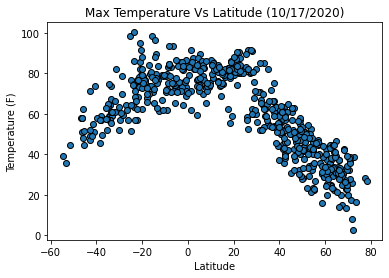

In [6]:
# Temperature Vs Latitude Scatter plot
latitude = weather_df['Latitude']
temperature = weather_df['Temperature']
plt.scatter(latitude,temperature, marker = 'o',edgecolors = 'black')
plt.title(f'Max Temperature Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.savefig("output/tempvslat.png")
plt.show()

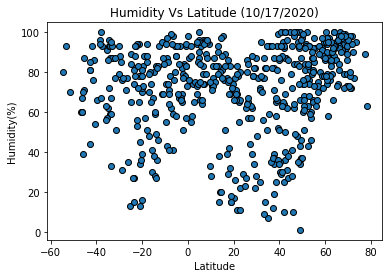

In [7]:
# Humidity (%) vs. Latitude
humidity = weather_df['Humidity']
plt.scatter(latitude,humidity, marker = 'o',edgecolors = 'black')
plt.title(f'Humidity Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.savefig("output/humvslat.png")
plt.show()

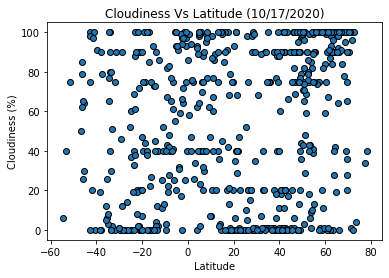

In [8]:
# Cloudiness (%) vs. Latitude
cloudiness = weather_df['Cloudiness']
plt.scatter(latitude,cloudiness, marker = 'o',edgecolors = 'black')
plt.title(f'Cloudiness Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("output/cloudvslat.png")
plt.show()

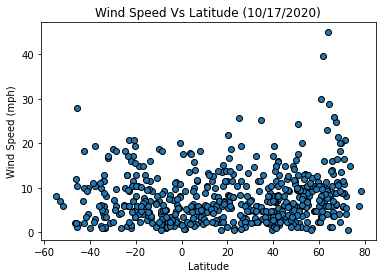

In [9]:
# Wind Speed (mph) vs. Latitude
wind = weather_df['Wind Speed']
plt.scatter(latitude,wind, marker = 'o',edgecolors = 'black')
plt.title(f'Wind Speed Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("output/windvslat.png")
plt.show()

In [10]:
# Splitting the data set into two hemispheres
weather_N_df = weather_df.loc[(weather_df['Latitude']>0)|(weather_df['Latitude'] == 0)]
weather_S_df = weather_df.loc[(weather_df['Latitude']<0)]

lat_N = weather_N_df['Latitude']
lat_S = weather_S_df['Latitude']

temp_N = weather_N_df['Temperature']
temp_S = weather_S_df['Temperature']

humid_N = weather_N_df['Humidity']
humid_S = weather_S_df['Humidity']

cloud_N = weather_N_df['Cloudiness']
cloud_S = weather_S_df['Cloudiness']

winspd_N = weather_N_df['Wind Speed']
winspd_S = weather_S_df['Wind Speed']

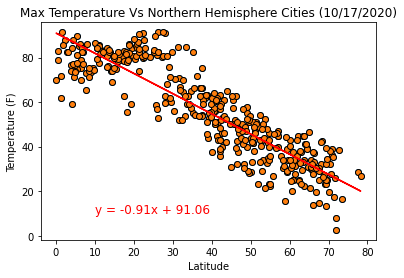

The correlation coefficient is -0.8892884044800474.


In [19]:
# Creating a regression line
x_values = lat_N
y_values = temp_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Max Temperature Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

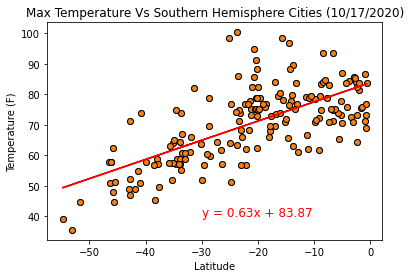

The correlation coefficient is 0.6815607175563746.


In [20]:
# Creating a regression line
x_values = lat_S
y_values = temp_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Max Temperature Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

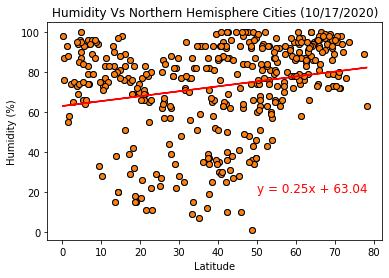

The correlation coefficient is 0.21620316336012863.


In [21]:
# Creating a regression line
x_values = lat_N
y_values = humid_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Humidity Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

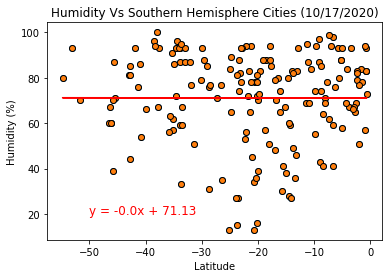

The correlation coefficient is -0.0006056171784145188.


In [22]:
# Creating a regression line
x_values = lat_S
y_values = humid_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Humidity Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

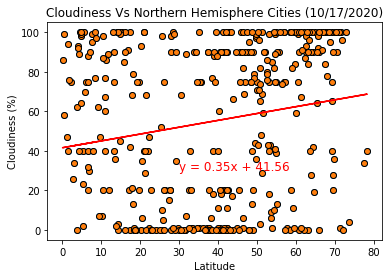

The correlation coefficient is 0.17912183715354543.


In [23]:
# Creating a regression line
x_values = lat_N
y_values = cloud_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Cloudiness Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

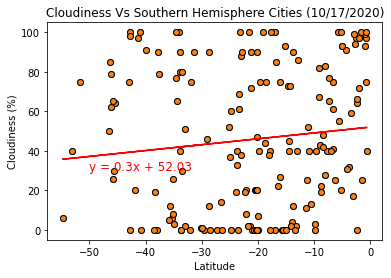

The correlation coefficient is 0.11167245410863388.


In [24]:
# Creating a regression line
x_values = lat_S
y_values = cloud_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Cloudiness Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

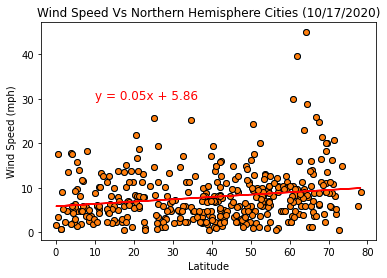

The correlation coefficient is 0.18274564963866458.


In [25]:
# Creating a regression line
x_values = lat_N
y_values = winspd_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Wind Speed Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')

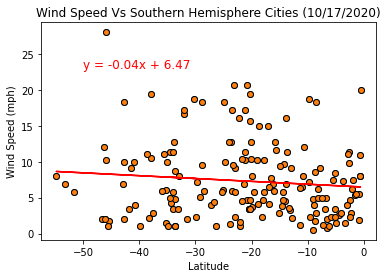

The correlation coefficient is -0.10103996949974679.


In [26]:
# Creating a regression line
x_values = lat_S
y_values = winspd_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=12,color="red")

plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Wind Speed Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

print(f'The correlation coefficient is {rvalue}.')